In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Case 1: Binomial Trees

Asha de Meij (i6254733)

**Task:** Consider the unit-linked contract with maturity guarantee that was discussed in the lecture.
Take the risk-free rate equal to r = 1%, the volatility of the investment fund o = 15% and
the final guaranteed amount at T = 10 equal to 100 (i.e., we have a contract with a 0%
guarantee).

Make a computer program where you increase the number of steps in the binomial tree from 4 to 100 and
make a graph of how the price of the contract as a function of the number of steps develops.

# Code

In [2]:
r = 0.01
sigma = 0.15
T = 10 
guarantee = 100
n = 100

In [3]:
def get_optionPrice(r, sigma, T, guarantee, n):

    # Formulas from slides
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    R_dt = np.exp(r*dt) # growth factor at each time step
    p = (R_dt - d) / (u - d) # Risk-neutral probability
    q = 1 - p


    # 1. calculate the stock price
    stockValues = np.zeros((n+1, n+1))
    
    for i in range(1,n+1):
        for j in range(1,i+1):
           stockValues[i,j] = 100*(u ** (i-j)) * (d ** j)
  


    # 2. Calculate the contract price: recursive procedure
    contractPrice = np.zeros((n+1, n+1))

    for i in range(n+1):
         contractPrice[n,i] = np.maximum(0, guarantee - stockValues[n,i]) 
         
    for i in range(n - 1, -1, -1):
        for j in range(i+1):
            contractPrice[i,j] = (1/R_dt)*(p*contractPrice[i+1,j] + q*contractPrice[i+1,j+1])

    initialPrice = contractPrice[0,0]
       
    return initialPrice

Price of the Contract:  13.439537823428788


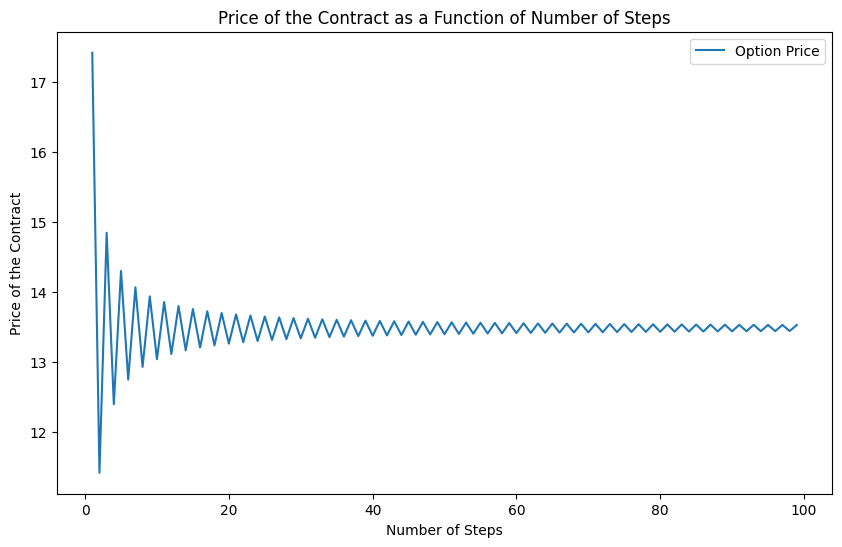

In [4]:
step_counts = range(1, 100)
prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]

print("Price of the Contract: ", get_optionPrice(r, sigma, T, guarantee, n)) 


plt.figure(figsize=(10, 6))
plt.plot(step_counts, prices, label='Option Price')
plt.xlabel('Number of Steps')
plt.ylabel('Price of the Contract')
plt.title('Price of the Contract as a Function of Number of Steps')
plt.legend()
plt.show()

**Questions:**
1. Can you explain the pattern that you see in the graph? To help you investigate the
convergence pattern, make an extra plot of the stock price S, in two nearest nodes
at T = 10, just above and below the guarantee level, as a function of the number of
steps.

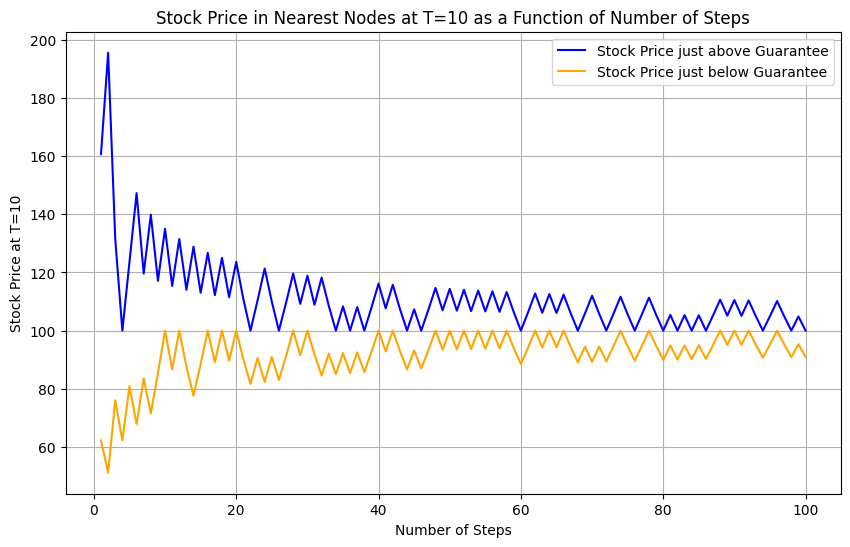

In [24]:
def get_stock_price_nearest_nodes(r, sigma, T, guarantee, n_max):
    dt_values = []
    S_above_values = []
    S_below_values = []

    for n in range(1, n_max + 1):
        dt = T / n
        u = np.exp(sigma * np.sqrt(dt))
        d = 1 / u

        # 1. Calculate the stock price
        stockValues = np.zeros((n + 1, n + 1))
        stockValues[0, 0] = 100  # Initial value
        
        for i in range(1, n + 1):
            stockValues[i, 0] = u * stockValues[i - 1, 0]
            for j in range(1, i + 1):
                stockValues[i, j] = d * stockValues[i - 1, j - 1]

        # Find nodes where stock price is just above and just below the guarantee level
        last_row = stockValues[n]
        S_above = min([price for price in last_row if price > guarantee], default=np.nan)
        S_below = max([price for price in last_row if price < guarantee], default=np.nan)

        dt_values.append(n)
        S_above_values.append(S_above)
        S_below_values.append(S_below)

    return dt_values, S_above_values, S_below_values

# Parameters
n_max = 100  # Maximum number of steps

# Get stock prices just above and below the guarantee level
dt_values, S_above_values, S_below_values = get_stock_price_nearest_nodes(r, sigma, T, guarantee, n_max)

# Plotting stock prices at nodes just above and below the guarantee level
plt.figure(figsize=(10, 6))
plt.plot(dt_values, S_above_values, label='Stock Price just above Guarantee', color='blue')
plt.plot(dt_values, S_below_values, label='Stock Price just below Guarantee', color='orange')
plt.xlabel('Number of Steps')
plt.ylabel('Stock Price at T=10')
plt.title('Stock Price in Nearest Nodes at T=10 as a Function of Number of Steps')
plt.legend()
plt.show()


2. When you keep the number of steps fixed (say 100), how does the price of the
contract change if you change r or o or T. Can you explain these changes?

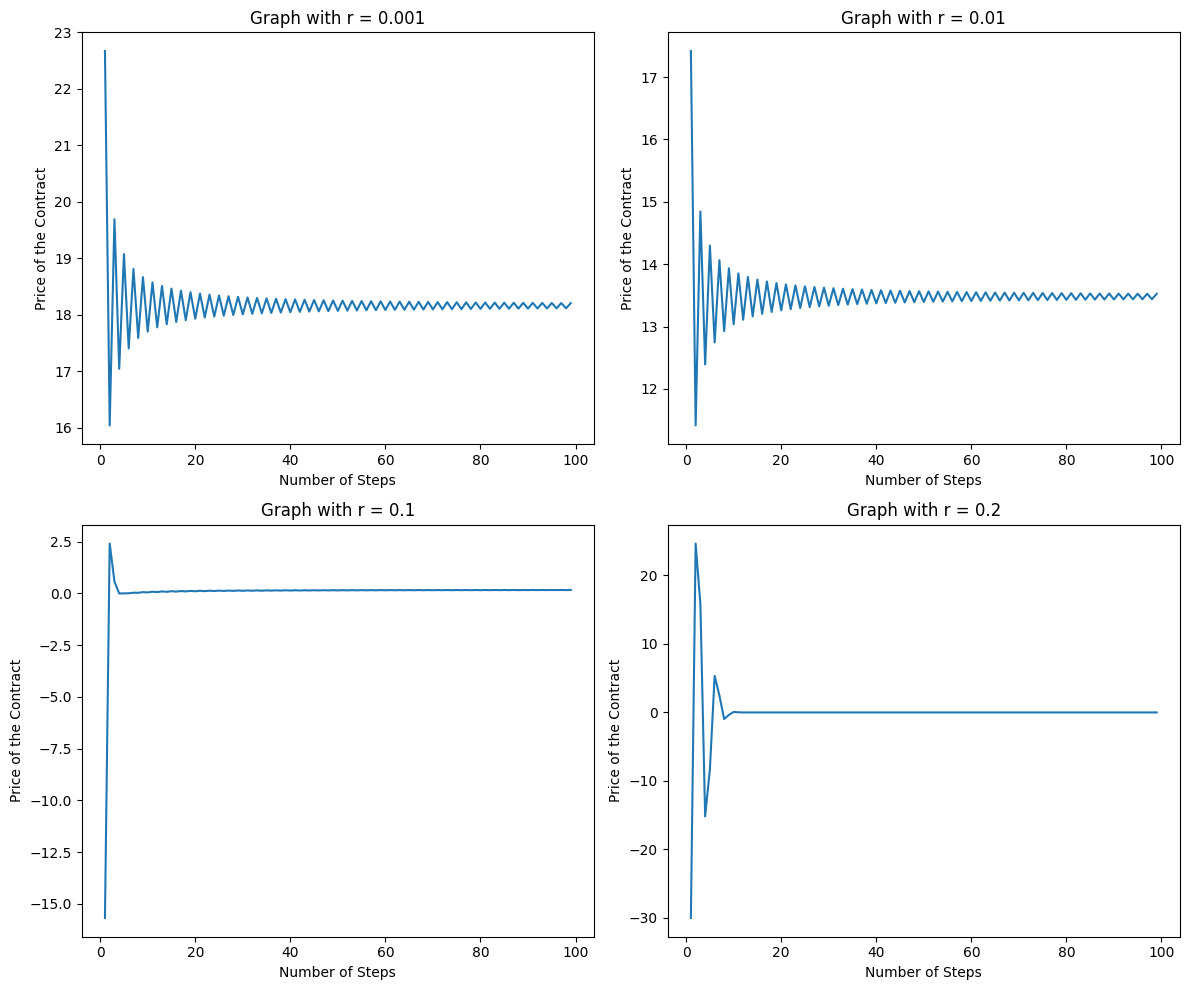

In [7]:
# First we can check for different numbers of r
step_counts = range(1, 100)
r_values = [0.001, 0.01, 0.1, 0.2]  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, r in enumerate(r_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices)
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Graph with r = {r}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change r?**
The price of contract is more expensive for smaller values of R (cheaper for bigger values of r). The outcome is explauned by the fact that  leaving money in the bank doesn’t grow much which makes the contract more attractive since it seems like a better way to use the money. If r is big leaving the money in the bank is more rewarding hence the contract price goes down.

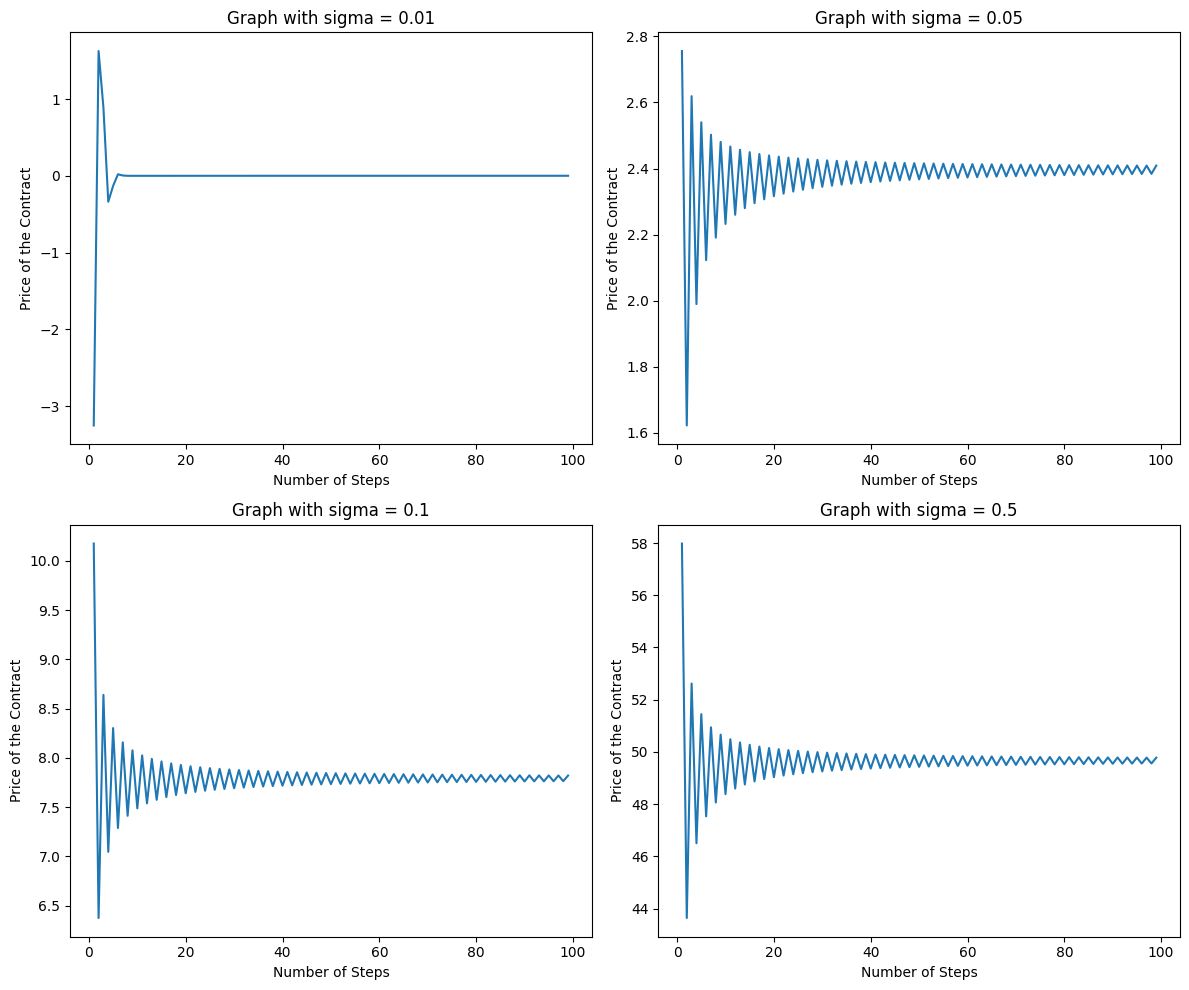

In [18]:
# Now we can check for different numbers of sigma
step_counts = range(1, 100)
sigma_values = [0.01, 0.05, 0.1, 0.5]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, sigma in enumerate(sigma_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices)
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Graph with sigma = {sigma}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change sigma?**

With lower sigma the price of the contract is cheaper, when it is higher the price becomes higher. The results make sense since high volatility increases the probability that the contract will end up profitable because there’s more room for upward price movements. If the sigma is low there is not much "space" for the contract to become profitable.

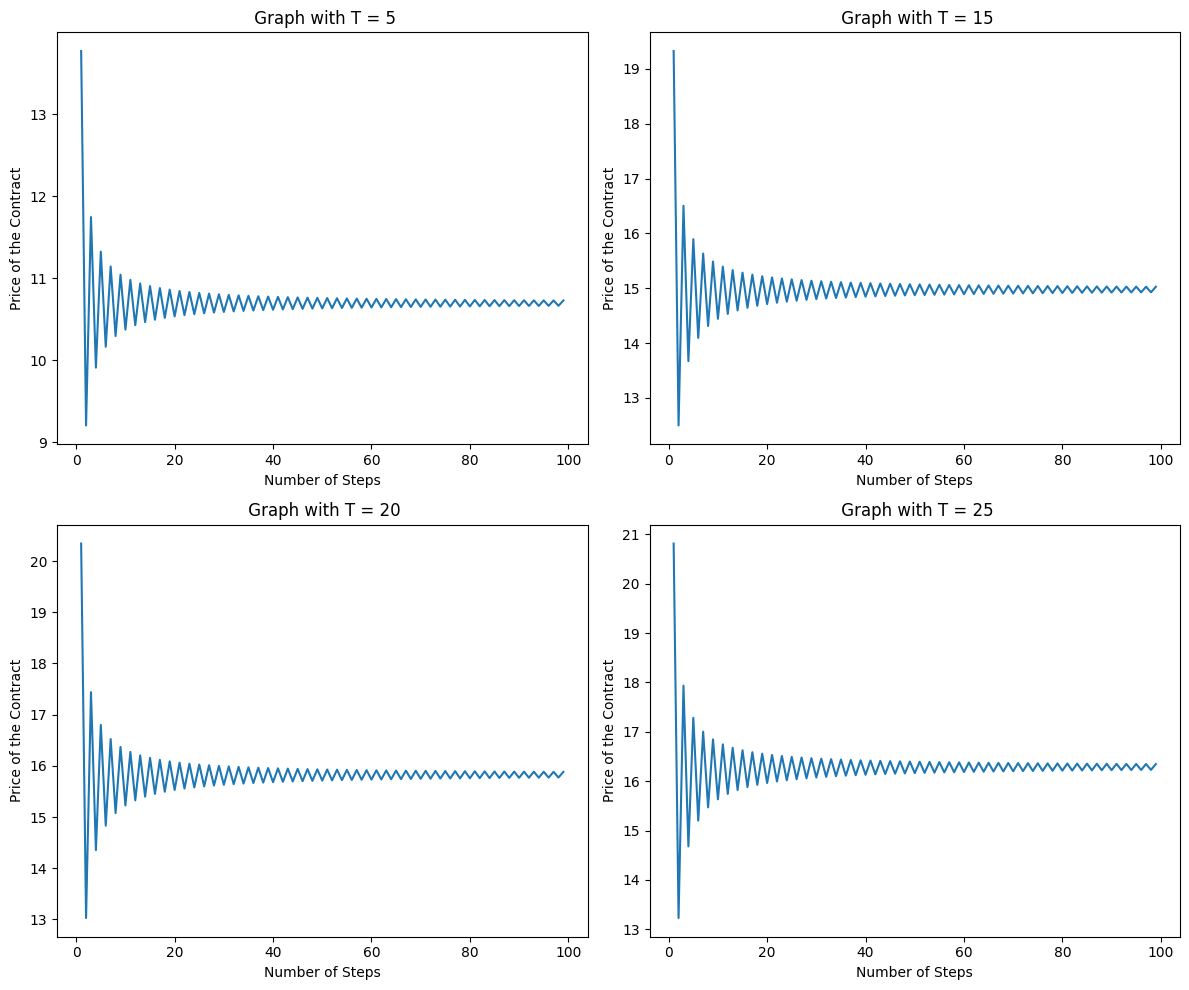

In [6]:
# Now we can do the same for different numbers of T
T_values = [5, 15, 20, 25]  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, T in enumerate(T_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices, label=f'Option Price for T = {T}')
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f' Graph with T = {T}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change T?**

Similarly, as T is smaller the price of contract is lower compared to when its higher. This result follows form the fact that the stock price has more time to increase since there is more time and obvioulsy also because the guarantee holds for a longer time period

**3. Can you modify your program to make it run faster (e.g., for a tree with 10 000
steps)? If so, what changes did you make compared to your initial code? Describe
how you have analysed the run-time of the code.**

I previously used for loops (even worse "nested" for loops :D) to compute the stock as well as the option price. However, if i were to consider 10 000 time steps (or perhaps even more) the matrices would grow enormously. This porblem can be solved using vector operations

In [4]:
def get_optionPrice_2(r, sigma, T, guarantee, n):

    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    R_dt = np.exp(r * dt)
    p = (R_dt - d) / (u - d)

    stockValues = np.zeros((n+1, n+1))
    stockValues[0,0] = 100 
    
    for i in range(1,n+1):
        stockValues[i,0] = u*stockValues[i-1,0]
        for j in range(1,i+1):
           stockValues[i,j] = d*stockValues[i-1,j-1]


    steps = np.arange(n + 1)
    stockValues = np.outer(u**steps, d**steps[::-1]) * 100  # Vectorized stock price computation

    # 2. Vectorized calculation of contract payoff at maturity
    contractPrice = np.maximum(guarantee - stockValues, 0)  # Payoff at maturity

    # 3. Backward induction with in-place updating for option price calculation
    for i in range(n - 1, -1, -1):
        contractPrice[i, :i+1] = (1 / R_dt) * (p * contractPrice[i + 1, :i+1] + (1 - p) * contractPrice[i + 1, 1:i+2])

    # Return the initial contract price
    return contractPrice[0, 0]